# **Multilayer Sequential Model for Pneumonia Detection using Chest X-Ray Images**<br>
## **Classification into (NORMAL OR PNEUMONIA)**
###  The dataset comprises chest-xray images for pneumonia detection. It has already been classified into train and test folders respectively containing 5232 and 624 x-ray images. The task is to frame a deep learning model that can classify the x-ray scans into 'Normal' or 'Pneumonia'. This program has used the simplest model, i.e., Sequential API with fully connected dense layers.

###Kindly Note that since the following code has been compiled in Google Colab, the dataset has not been imported locally, rather directly extracted from Kaggle Database online using .json file uploaded to the linked GoogleDrive account (neelagarwal98@gmail.com)

###**Dataset Link:https://www.kaggle.com/tolgadincer/labeled-chest-xray-images**

#### **Importing libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras

### **Mounting google drive endpoint for importing dataset through Kaggle directly online**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


### **Direct import of dataset from kaggle by the Kaggle.json file uploaded to drive**

In [5]:
!kaggle datasets download -d tolgadincer/labeled-chest-xray-images --force

 99% 1.17G/1.17G [00:47<00:00, 29.6MB/s]
100% 1.17G/1.17G [00:47<00:00, 26.5MB/s]


In [6]:
!ls    #listing the directory

chest_xray  kaggle.json  labeled-chest-xray-images.zip


In [7]:
!unzip \*.zip  && rm *.zip     #unzipping all the .zip folders

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/NORMAL-2558319-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2559035-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2559035-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2565226-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2568157-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2597757-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2597757-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-263932-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2646645-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2646923-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2655558-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2659844-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2675017-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2675017-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2689107-00

In [8]:
#url = "/content/gdrive/My Drive/Kaggle/labeled-chest-xray-images.zip "
#dataset_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=url,extract=True)

#chest_xray folder directory address saved in a variable dataset_dir

dataset_dir = "/content/gdrive/My Drive/Kaggle/chest_xray" 
print(dataset_dir)

/content/gdrive/My Drive/Kaggle/chest_xray


In [9]:
#train and test directories defined
train_dir = "/content/gdrive/My Drive/Kaggle/chest_xray/train"
test_dir = "/content/gdrive/My Drive/Kaggle/chest_xray/test"

print(train_dir)
print(test_dir)

/content/gdrive/My Drive/Kaggle/chest_xray/train
/content/gdrive/My Drive/Kaggle/chest_xray/test


###**Loading the dataset using image_dataset_from_directory function**

In [36]:
BATCH_SIZE = 32  # the model was experimented with different batch sizes 16,32,64,128.., of which 32 was found to be most suitable for overfitting problem
IMG_SIZE = (224,224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               shuffle = True,
                                                               batch_size = BATCH_SIZE,
                                                               image_size=IMG_SIZE)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                             shuffle = True,
                                                             batch_size = BATCH_SIZE,
                                                             image_size = IMG_SIZE
                                                             )

Found 5232 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [37]:
#classification involves only 2 categories - NORMAL and PNEUMONIA
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [38]:
# Given that the batch size has already been defined to be 32, the number of train_batches and test_batches is thus checked using cardinality function 
train_batches = tf.data.experimental.cardinality(train_ds)
print(train_batches)
test_batches = tf.data.experimental.cardinality(test_ds)
print(test_batches)

tf.Tensor(164, shape=(), dtype=int64)
tf.Tensor(20, shape=(), dtype=int64)


In [39]:
for img_batch,label_batch in train_ds.take(1):
  print(img_batch.shape)
  print(label_batch.shape)
  print(label_batch)
  print(img_batch[0])

(32, 224, 224, 3)
(32,)
tf.Tensor([1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1], shape=(32,), dtype=int32)
tf.Tensor(
[[[ 47.67857   47.67857   47.67857 ]
  [ 44.99426   44.99426   44.99426 ]
  [ 47.063137  47.063137  47.063137]
  ...
  [210.99174  210.99174  210.99174 ]
  [215.12502  215.12502  215.12502 ]
  [221.4822   221.4822   221.4822  ]]

 [[ 47.67857   47.67857   47.67857 ]
  [ 47.482143  47.482143  47.482143]
  [ 44.325256  44.325256  44.325256]
  ...
  [210.92471  210.92471  210.92471 ]
  [210.44644  210.44644  210.44644 ]
  [218.80362  218.80362  218.80362 ]]

 [[ 47.67857   47.67857   47.67857 ]
  [ 49.        49.        49.      ]
  [ 46.803574  46.803574  46.803574]
  ...
  [205.84561  205.84561  205.84561 ]
  [209.92859  209.92859  209.92859 ]
  [219.5179   219.5179   219.5179  ]]

 ...

 [[ 14.        14.        14.      ]
  [ 14.        14.        14.      ]
  [ 13.        13.        13.      ]
  ...
  [ 37.214355  37.214355  37.214355]
  [ 54.71435

###**Data visualisation - plotting 1 batch of 32 x-ray images (in training dataset)**

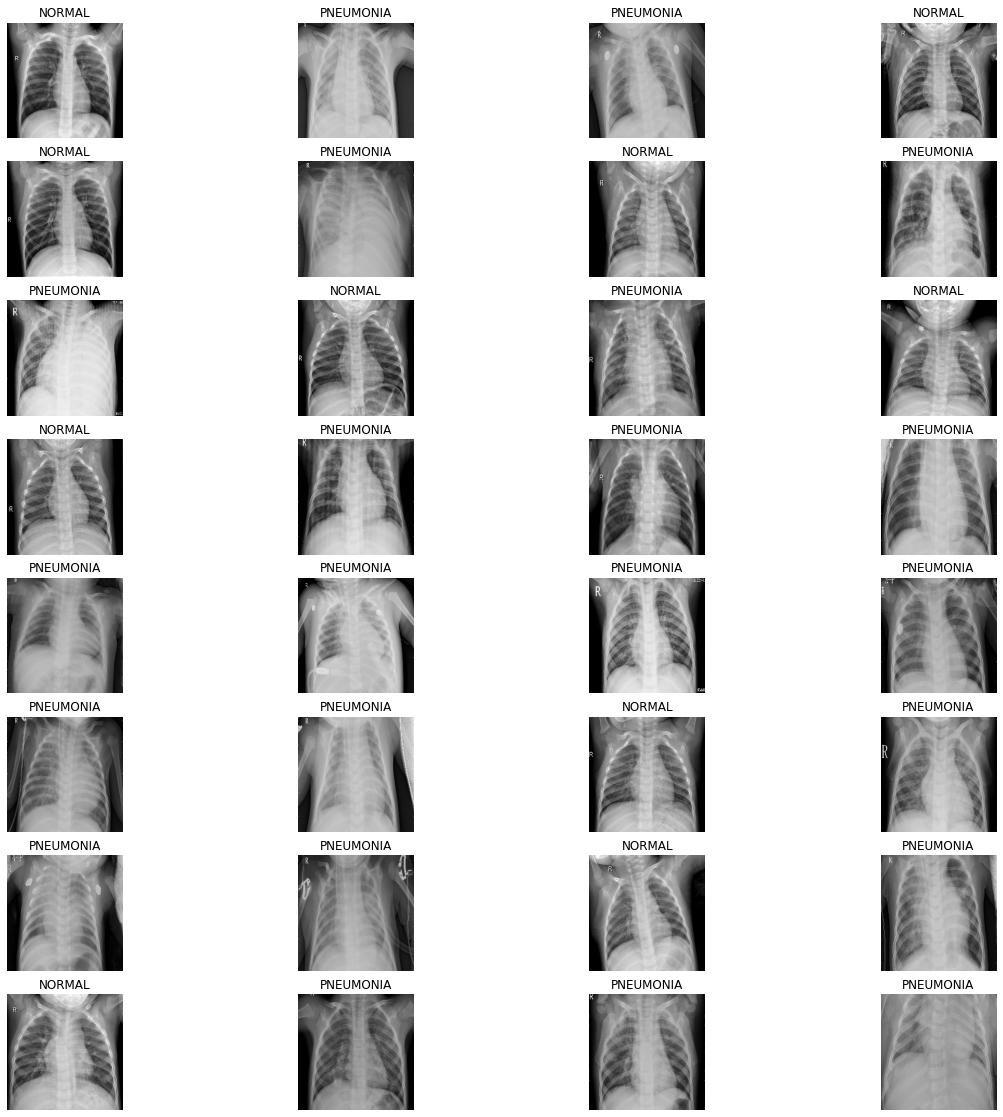

In [40]:
plt.figure(figsize=(20,20))
for img_batch,label_batch in train_ds.take(1):
  for i in range(BATCH_SIZE):
    plt.subplot(8,4,i+1)
    plt.imshow(img_batch[i]/255.0)
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [41]:
print('Total number of train batches',tf.data.experimental.cardinality(train_ds).numpy())
print('Total number of test batches',tf.data.experimental.cardinality(test_ds).numpy()) # a recheck to the batch sizes (cardinality) of train and test datasets

Total number of train batches 164
Total number of test batches 20


###**Distributing the train dataset into 80% training data, 20% validation data**

In [42]:
val_ds = train_ds.take(33) # the validation dataset will have 20% of training batches (i.e.,0.2*164=33)
train_ds = train_ds.skip(33) # after assigning 33 batches for validation, the remaining (164-33 = 131) will form training batches

print("Total number of VALIDATION batches",tf.data.experimental.cardinality(val_ds).numpy())
print("Total number of TRAIN batches",tf.data.experimental.cardinality(train_ds).numpy())


Total number of VALIDATION batches 33
Total number of TRAIN batches 131


###**Defining Sequential model to be using SGD optimiser**

In [61]:
#Initially no dropout,augmentation or regularisation layers used, the model gave train_acc-0.9473,valid_acc-0.7841,test_acc-0.8253
#Clearly the model was overfitting, to handle the same, different combinations of methods were implemented, including data augmentation, regularisation,
#early-stopping and dropout layers of which only the inclusion of Dropout layers proved to provide best possible solution with least overfitting
#Early-stop was dropped due to limited number of epochs

from tensorflow.keras import layers
model=keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1.0/255)) # Feature scaling, normalising pixels between 0 & 1

#Data augmentation
#model.add(layers.experimental.preprocessing.RandomFlip('horizontal'))
#model.add(layers.experimental.preprocessing.RandomZoom(0.2))

model.add(layers.Flatten(input_shape=(224,224,3)))
#model.add(layers.Dense(224,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.Dense(224,activation='relu'))
model.add(layers.Dense(149,activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(99,activation='relu'))
model.add(layers.Dense(66,activation='relu'))

model.add(layers.Dropout(0.2))

#model.add(layers.Dense(44,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dense(44,activation='relu'))
model.add(layers.Dense(29,activation='relu'))

model.add(layers.Dropout(0.2))

model.add(layers.Dense(19,activation='relu'))
model.add(layers.Dense(12,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(2,activation='sigmoid'))

In [65]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
loss0,acc0 = model.evaluate(test_ds) #initial loss and accuracy on test data before training 
print("Initial test acc:",acc0)


20/20 [==============================] - 4s 217ms/step - loss: 0.7001 - accuracy: 0.3750
Initial test acc: 0.375


In [59]:
'''
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
epochs=20
early_hist=model.fit(train_ds,validation_data=val_ds,
                        epochs=epochs,callbacks=[early_stop])
early_df=pd.DataFrame(early_hist.history)
loss1,acc1 = model.evaluate(test_ds)
print("\n",acc1)
'''

'\nearly_stop=tf.keras.callbacks.EarlyStopping(monitor=\'val_loss\',patience=10)\nepochs=20\nearly_hist=model.fit(train_ds,validation_data=val_ds,\n                        epochs=epochs,callbacks=[early_stop])\nearly_df=pd.DataFrame(early_hist.history)\nloss1,acc1 = model.evaluate(test_ds)\nprint("\n",acc1)\n'

###**Running the train data to fit the sequential model<br>TRAIN_ACC-0.9370<br>TEST_ACC-0.8654<br>VALID_ACC-0.9422 <br>after 20 epochs**

In [66]:
#Fitting the model and tracing loss and accuracy for SGD optimiser
initial_epoch = 20
hist = model.fit(train_ds,epochs=initial_epoch,validation_data=val_ds) # hist is to record the progress of training losses and metrics through each epoch
loss1,acc1 = model.evaluate(test_ds)
print("\nTesting Acc:",acc1)


Epoch 1/20
131/131 [==============================] - 63s 484ms/step - loss: 0.6869 - accuracy: 0.6559 - val_loss: 0.6767 - val_accuracy: 0.7491
Epoch 2/20
131/131 [==============================] - 64s 492ms/step - loss: 0.6690 - accuracy: 0.7438 - val_loss: 0.6595 - val_accuracy: 0.7528
Epoch 3/20
131/131 [==============================] - 64s 490ms/step - loss: 0.6533 - accuracy: 0.7416 - val_loss: 0.6464 - val_accuracy: 0.7491
Epoch 4/20
131/131 [==============================] - 65s 498ms/step - loss: 0.6366 - accuracy: 0.7488 - val_loss: 0.6275 - val_accuracy: 0.7358
Epoch 5/20
131/131 [==============================] - 63s 482ms/step - loss: 0.6116 - accuracy: 0.7838 - val_loss: 0.5837 - val_accuracy: 0.8494
Epoch 6/20
131/131 [==============================] - 65s 499ms/step - loss: 0.5772 - accuracy: 0.8341 - val_loss: 0.5458 - val_accuracy: 0.8665
Epoch 7/20
131/131 [==============================] - 64s 490ms/step - loss: 0.5244 - accuracy: 0.8623 - val_loss: 0.4547 - val_ac

###**Plotting accuracies and losses and using model for Prediction**

Text(0.5, 1.0, 'Loss Plot')

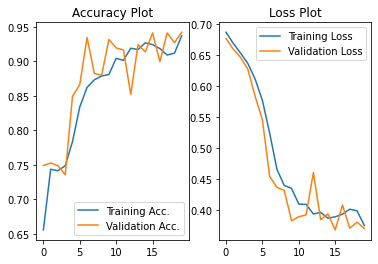

In [67]:
#Plotting loss and accuracy

train_acc=hist.history['accuracy']
train_loss=hist.history['loss']
val_acc=hist.history['val_accuracy']
val_loss=hist.history['val_loss']

plt.subplot(1,2,1)
plt.plot(train_acc,label='Training Acc.')
plt.plot(val_acc,label='Validation Acc.')
plt.legend()
plt.title('Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(train_loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.legend()
plt.title('Loss Plot')

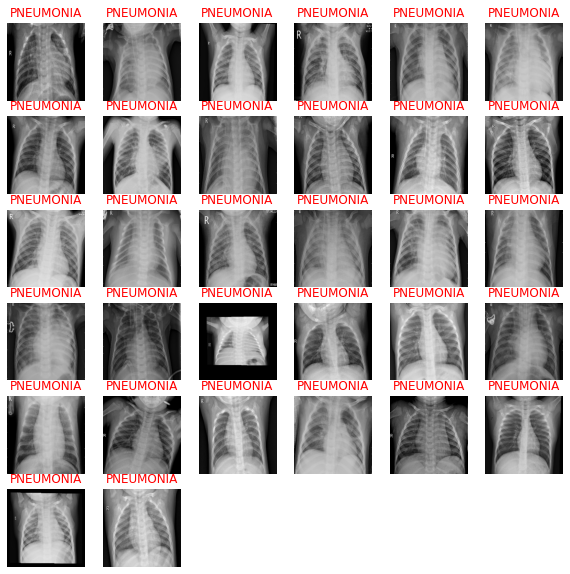

In [72]:
image_batch,label_batch=next(iter(test_ds))
#print(label_batch.numpy())
pred=model.predict(image_batch).flatten()
#print(pred)
prediction=tf.nn.sigmoid(pred)
prediction=tf.where(prediction<0.5,0,1)
#print(prediction)

plt.figure(figsize=(10,10))
for i in range(32):
    plt.subplot(6,6,i+1)
    plt.imshow(image_batch[i]/255)
    plt.title(class_names[prediction[i]],color='red')
    plt.axis('off')



#**Using other optimisers (Adam,RMSProp,Adagrad) to compare accuracies and losses**

##**Adam**

In [75]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
initial_epoch = 20
hist2 = model.fit(train_ds,epochs=initial_epoch,validation_data=val_ds) 
loss2,acc2 = model.evaluate(test_ds)
print("\n",acc2)


Epoch 1/20
131/131 [==============================] - 71s 540ms/step - loss: 0.5724 - accuracy: 0.7409 - val_loss: 0.5585 - val_accuracy: 0.7547
Epoch 2/20
131/131 [==============================] - 69s 527ms/step - loss: 0.5726 - accuracy: 0.7407 - val_loss: 0.5633 - val_accuracy: 0.7500
Epoch 3/20
131/131 [==============================] - 69s 528ms/step - loss: 0.5728 - accuracy: 0.7404 - val_loss: 0.5585 - val_accuracy: 0.7547
Epoch 4/20
131/131 [==============================] - 68s 522ms/step - loss: 0.5714 - accuracy: 0.7419 - val_loss: 0.5661 - val_accuracy: 0.7472
Epoch 5/20
131/131 [==============================] - 68s 517ms/step - loss: 0.5733 - accuracy: 0.7399 - val_loss: 0.5642 - val_accuracy: 0.7491
Epoch 6/20
131/131 [==============================] - 68s 516ms/step - loss: 0.5704 - accuracy: 0.7428 - val_loss: 0.5746 - val_accuracy: 0.7386
Epoch 7/20
131/131 [==============================] - 69s 523ms/step - loss: 0.5733 - accuracy: 0.7399 - val_loss: 0.5689 - val_ac

##**RMSProp**

In [84]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
initial_epoch = 20
hist3 = model.fit(train_ds,epochs=initial_epoch,validation_data=val_ds) 
loss3,acc3 = model.evaluate(test_ds)
print("\n",acc3)

Epoch 1/20
131/131 [==============================] - 87s 664ms/step - loss: 0.5724 - accuracy: 0.7409 - val_loss: 0.5670 - val_accuracy: 0.7462
Epoch 2/20
131/131 [==============================] - 88s 673ms/step - loss: 0.5714 - accuracy: 0.7419 - val_loss: 0.5727 - val_accuracy: 0.7405
Epoch 3/20
131/131 [==============================] - 86s 660ms/step - loss: 0.5724 - accuracy: 0.7409 - val_loss: 0.5566 - val_accuracy: 0.7566
Epoch 4/20
131/131 [==============================] - 87s 661ms/step - loss: 0.5688 - accuracy: 0.7445 - val_loss: 0.5689 - val_accuracy: 0.7443
Epoch 5/20
131/131 [==============================] - 88s 670ms/step - loss: 0.5716 - accuracy: 0.7416 - val_loss: 0.5756 - val_accuracy: 0.7377
Epoch 6/20
131/131 [==============================] - 87s 663ms/step - loss: 0.5709 - accuracy: 0.7423 - val_loss: 0.5689 - val_accuracy: 0.7443
Epoch 7/20
131/131 [==============================] - 86s 657ms/step - loss: 0.5702 - accuracy: 0.7431 - val_loss: 0.5699 - val_ac

##**Adagrad**

In [86]:
model.compile(optimizer = tf.keras.optimizers.Adagrad(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
initial_epoch = 20
hist4 = model.fit(train_ds,epochs=initial_epoch,validation_data=val_ds) 
loss4,acc4 = model.evaluate(test_ds)
print("\n",acc4)

Epoch 1/20
131/131 [==============================] - 68s 521ms/step - loss: 0.5731 - accuracy: 0.7402 - val_loss: 0.5727 - val_accuracy: 0.7405
Epoch 2/20
131/131 [==============================] - 67s 514ms/step - loss: 0.5712 - accuracy: 0.7421 - val_loss: 0.5604 - val_accuracy: 0.7528
Epoch 3/20
131/131 [==============================] - 69s 525ms/step - loss: 0.5743 - accuracy: 0.7390 - val_loss: 0.5680 - val_accuracy: 0.7453
Epoch 4/20
131/131 [==============================] - 70s 532ms/step - loss: 0.5733 - accuracy: 0.7399 - val_loss: 0.5623 - val_accuracy: 0.7509
Epoch 5/20
131/131 [==============================] - 68s 519ms/step - loss: 0.5740 - accuracy: 0.7392 - val_loss: 0.5642 - val_accuracy: 0.7491
Epoch 6/20
131/131 [==============================] - 70s 533ms/step - loss: 0.5716 - accuracy: 0.7416 - val_loss: 0.5670 - val_accuracy: 0.7462
Epoch 7/20
131/131 [==============================] - 68s 521ms/step - loss: 0.5712 - accuracy: 0.7421 - val_loss: 0.5794 - val_ac

###**Performance Comparision of different optimisers using Loss Plots**

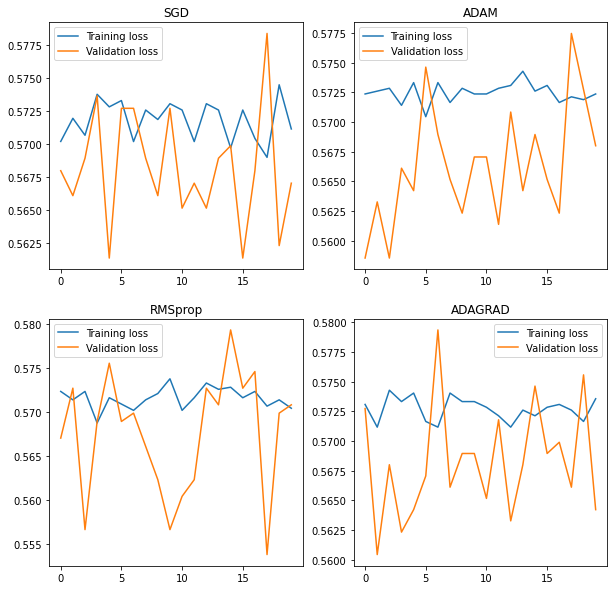

In [89]:
plt.figure(figsize=(10,10))
train_loss_sgd=hist.history['loss']
val_loss_sgd=hist.history['val_loss']

train_loss_adam=hist2.history['loss']
val_loss_adam=hist2.history['val_loss']

train_loss_rms=hist3.history['loss']
val_loss_rms=hist3.history['val_loss']

train_loss_adagrad=hist4.history['loss']
val_loss_adagrad=hist4.history['val_loss']

plt.subplot(2,2,1)
plt.plot(train_loss_sgd,label='Training loss')
plt.plot(val_loss_sgd,label='Validation loss')
plt.legend()
plt.title('SGD')

plt.subplot(2,2,2)
plt.plot(train_loss_adam,label='Training loss')
plt.plot(val_loss_adam,label='Validation loss')
plt.legend()
plt.title('ADAM')

plt.subplot(2,2,3)
plt.plot(train_loss_rms,label='Training loss')
plt.plot(val_loss_rms,label='Validation loss')
plt.legend()
plt.title('RMSprop')

plt.subplot(2,2,4)
plt.plot(train_loss_adagrad,label='Training loss')
plt.plot(val_loss_adagrad,label='Validation loss')
plt.legend()
plt.title('ADAGRAD')

plt.show()